# Geodatenanalyse 1

## Tag 1 / Block 2 / Übung 3: Schließende Statistik - Lösung

In dieser Übung wollen wir uns die Grundwasserdaten aus den letzten beiden Übungen genauer anschauen, und von den gemessenenen Stichproben auf die Gesamtgrundheit der Werte im Hardtwald schließen. Dazu lesen wir zuerst den kompletten Datensatz aus Excel in Python ein, und unterteilen ihn wie in der letzten Übung in die Daten aus dem Bereich des Waldes und der Stadt.

In [1]:
import numpy as np
data = np.genfromtxt(open("Data_GW_KA.csv", "rb"), delimiter=";", skip_header=1)
data_urban = data[0:30]
data_forest = data[31:39]

In der letzten Übung habt Ihr herausgefunden, dass man die Verteilung der gemessenenen Grundwassertemperaturen in der Stadt als normalverteilt annehmen kann. Angenommen Ihr wollt anschließend eine Modellierung durchführen und benötigt 50 zufällig verteilte Werte, die die gleiche statistische Verteilung aufweisen wie die gemessenen Grundwassertemperaturen. 

Dazu müsst Ihr zuerst herausfinden, welche Normalverteilung am besten auf Eure Daten passt. Also welchen Mittelwert und welche Varianz diese theoretische Verteilung hat. Benutzt dafür die Funktion `scipy.stats.norm.fit()`, die zwei Outputs ($\mu$, $\sigma$<sup>2</sup>) hat. 

In [9]:
from scipy.stats import norm
mean_f, var_f = norm.fit(data_urban[:,3])
print (mean_f, var_f)

14.194666666666667 1.6724328254239558


Mit der Funktion `scipy.stats.norm.rvs()` könnt Ihr nun beliebig viele Zufallswerte generieren. Als Inputs müsst Ihr dafür die zwei statistischen Momente der Normalverteilung angeben, sowie die gewünschte Zahl an Werten (50). 

In [10]:
samples = norm.rvs(mean_f, var_f, 50)

Inspiziert nun die erzeugten Werte. Lasst Euch zur Kontrolle auch Mittelwert und Varianz der erzeugten Werte anzeigen, und vergleicht diese mit den Werten der angepassten theoretischen Normalverteilung. Stimmen diese überein?

In [11]:
from statistics import mean, variance
mean_samp = mean(samples)
var_samp = variance(samples)
print (mean_samp, var_samp)

14.28416275556721 1.9023550066769699


Wahrscheinlich stimmen die Mittelwerte und Varianzen nicht genau überein. Das könnte an der recht geringen Anzahl an generierten Werten (50) liegen. Versucht es daher mal mit 500.000 Werten, und überprüft die statistischen Parameter erneut. Frei nach dem Prinzip "Viel hilft viel". 

Hinweis: Habt Geduld, die Ausführung mit n=500000 könnte etwas dauern. 

In [12]:
samples2 = norm.rvs(mean_f, var_f, 500000)
mean_samp2 = mean(samples2)
var_samp2 = variance(samples2)
print (mean_samp2, var_samp2)

14.19408902605416 2.7987678573895503


Mittelwert und Varianz sollten nun deutlich näher an den angepassten Werten von oben liegen. Allerdings führt die große Anzahl an Werten (neben längeren Rechenzeiten) bei vielen Vertielungen zu einem anderen Problem. Bestimmt für den eben erzeugten Datensatz den Minimal- und Maximalwert. Was fällt dabei auf?

In [13]:
print (min(samples2), max(samples2))

6.330456507925061 21.52317310732777


Basierend auf den gemessenen Daten erscheinen diese Werte viel zu niedrig, bzw. zu hoch. Das liegt daran, dass mit einer hohen Anzahl an Zufallswerten auch Werte in den Extrembereichen mit sehr geringen Wahrscheinlichkeiten generiert werden. 

Das lässt sich vermeiden, indem man mit gestutzten (engl. truncated) Verteilungen arbeitet. Die Funktion `scipy.stats.truncnorm.rvs()` generiert solche Verteilungen. Dafür müssen vor den statistischen Momenten zwei Skalierungsparameter (*a*, *b*) angegeben werden: 

<img src="https://latex.codecogs.com/gif.latex?a&space;=&space;(Minimalwert&space;-&space;mean)/&space;std" title="a = (Minimalwert - mean)/ std" />

und 

<img src="https://latex.codecogs.com/gif.latex?b&space;=&space;(Maximalwert&space;-&space;mean)/&space;std" title="b = (Maximalwert - mean)/ std" />

Überlegt Euch nun sinnvolle Minimal- und Maximalwerte für Eure theoretische Verteilung, berechnet *a* und *b*, und erzeugt damit eine gestutzte Verteilung für die Grundwassertemperaturen. Schaut euch dann die deskriptiven Merkmale der erzeugten Werte an.

Hinweis: Falls Ihr eine Funktion für die Quadratwurzel braucht: `statistics.sqrt()`. Mit `scipy.stats.describe()` könnt Ihr Euch mit einem Befehl alle wichtigen statistitschen Parameter für eine Variable anzeigen lassen ;)



In [14]:
from scipy.stats import truncnorm
from scipy.stats import describe
import statistics
low = 12
upper = 18
a = (low-mean_f)/statistics.sqrt(var_f)
b = (upper-mean_f)/statistics.sqrt(var_f)
samp_trun = truncnorm.rvs(a, b, mean_f, var_f, size=500000)
describe(samp_trun)

DescribeResult(nobs=500000, minmax=(11.356469305024318, 19.115668736326178), mean=14.354840134882355, variance=2.255651091488391, skewness=0.2707651066475559, kurtosis=-0.3757630606167681)

Diese Werte erfüllen unsere Bedinungen nun deutlich besser, und wir könnten sie für weitere Berechnungen nutzen. 

Natürlich gibt es auch Funktionen zum Anpassen an andere theoretische Verteilungen neben der Normalverteilung. Eine Übersicht über die in `scipy` verfügbaren Verteilungen findet Ihr hier: https://docs.scipy.org/doc/scipy/reference/stats.html

Schlussendlich wird da Ganze natürlich viel anschaulicher, wenn man die beiden Verteilungen graphisch darstellt. Dafür findet Ihr im nächsten Fenster ein fertiges Skript. Führt es aus und schaut Euch die Verteilungen an. Wie beurteilt Ihr die optische Übereinstimmung? 

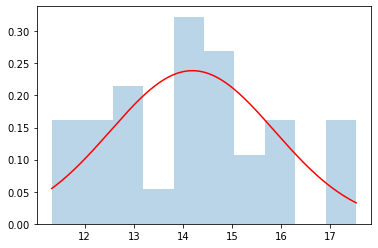

In [15]:
import numpy
import matplotlib.pyplot as plt

# generate x-values over range of GWT at which to calculate the probability 
x=numpy.linspace(data_urban[:,3].min(),data_urban[:,3].max(),1000)

# calculate values of fitted probability function at x 
pdf=norm.pdf(x,mean_f,var_f)

plt.plot(x,pdf,'r-') # plot fitted probability distribution
plt.hist(data_urban[:,3], density =True, alpha=.3) # plot original data as histogram 
plt.show()

Wie genau man einen Code mit matplotlib für solche und weitere Abbildungen schreibt erfahrt Ihr morgen. 


## Ende